In [1]:
import pickle
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from utils import check_in_weights, check_out_weights

In [2]:
# load graph object from file
G = pickle.load(open('graphs/march_22_home_origin.pickle', 'rb'))
income = gpd.read_file('/Users/caro/Desktop/thesis_project/segregation_indices/data/processed/geometries_and_income.geojson')

In [3]:
in_weights = check_in_weights(G)
out_weights = check_out_weights(G)

# Convert dictionaries to DataFrames
in_weights_df = pd.DataFrame(list(in_weights.items()), columns=['District', 'Total In-weight'])
out_weights_df = pd.DataFrame(list(out_weights.items()), columns=['District', 'Total Out-weight'])

Node Centro Total In-weight: 8.24
Node Arganzuela Total In-weight: 5.91
Node Retiro Total In-weight: 6.2
Node Salamanca Total In-weight: 7.69
Node Chamartín Total In-weight: 7.35
Node Tetuán Total In-weight: 5.84
Node Chamberí Total In-weight: 7.46
Node Fuencarral-El Pardo Total In-weight: 7.27
Node Moncloa-Aravaca Total In-weight: 7.05
Node Latina Total In-weight: 4.49
Node Carabanchel Total In-weight: 5.31
Node Usera Total In-weight: 4.76
Node Puente de Vallecas Total In-weight: 5.92
Node Moratalaz Total In-weight: 4.18
Node Ciudad Lineal Total In-weight: 6.63
Node Hortaleza Total In-weight: 6.18
Node Villaverde Total In-weight: 3.84
Node Villa de Vallecas Total In-weight: 4.65
Node Vicálvaro Total In-weight: 4.28
Node San Blas-Canillejas Total In-weight: 5.93
Node Barajas Total In-weight: 4.43
Node Centro Total Out-weight: 5.22
Node Arganzuela Total Out-weight: 5.31
Node Retiro Total Out-weight: 4.57
Node Salamanca Total Out-weight: 4.5
Node Chamartín Total Out-weight: 4.49
Node Tet

In [5]:
in_weights_df['Median income per consumption unit'] = income['Median income per consumption unit']
in_weights_df['Gini Index'] = income['Gini Index']

out_weights_df['Median income per consumption unit'] = income['Median income per consumption unit']
out_weights_df['Gini Index'] = income['Gini Index']

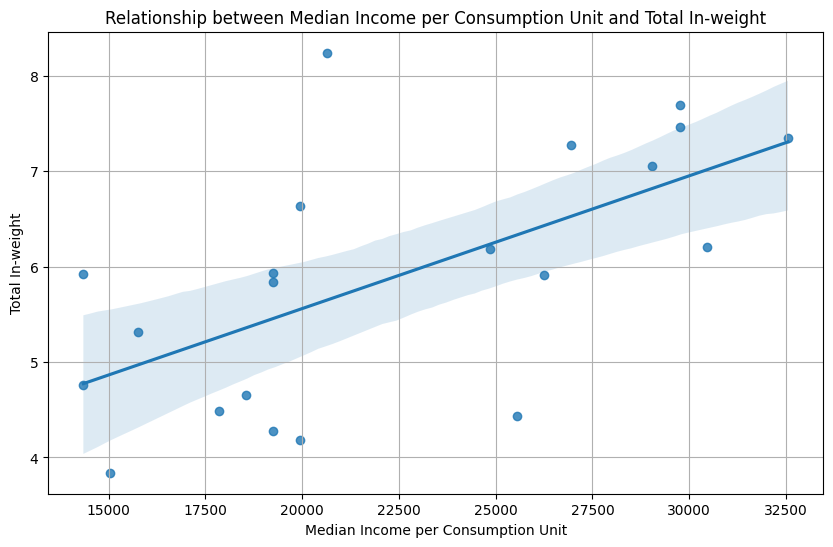

In [6]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Median income per consumption unit', y='Total In-weight', data=in_weights_df)
plt.xlabel('Median Income per Consumption Unit')
plt.ylabel('Total In-weight')
plt.title('Relationship between Median Income per Consumption Unit and Total In-weight')
plt.grid(True)
plt.show()

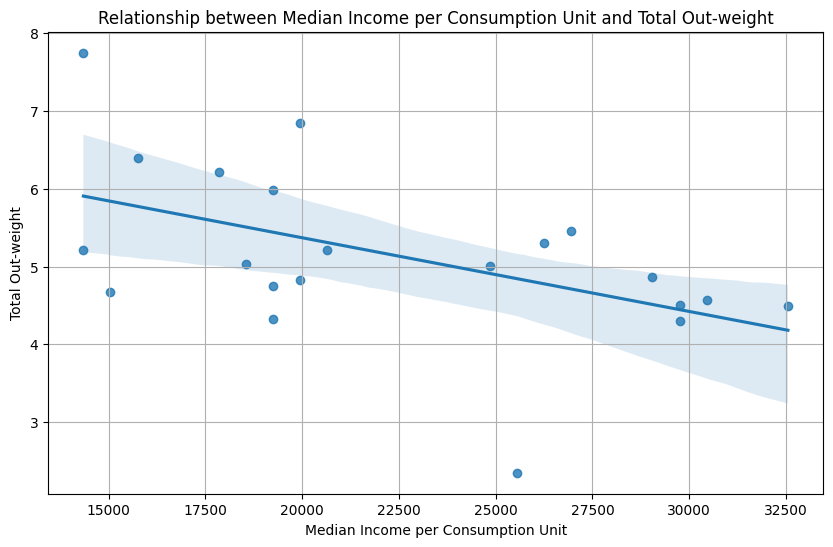

In [7]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Median income per consumption unit', y='Total Out-weight', data=out_weights_df)
plt.xlabel('Median Income per Consumption Unit')
plt.ylabel('Total Out-weight')
plt.title('Relationship between Median Income per Consumption Unit and Total Out-weight')
plt.grid(True)
plt.show()

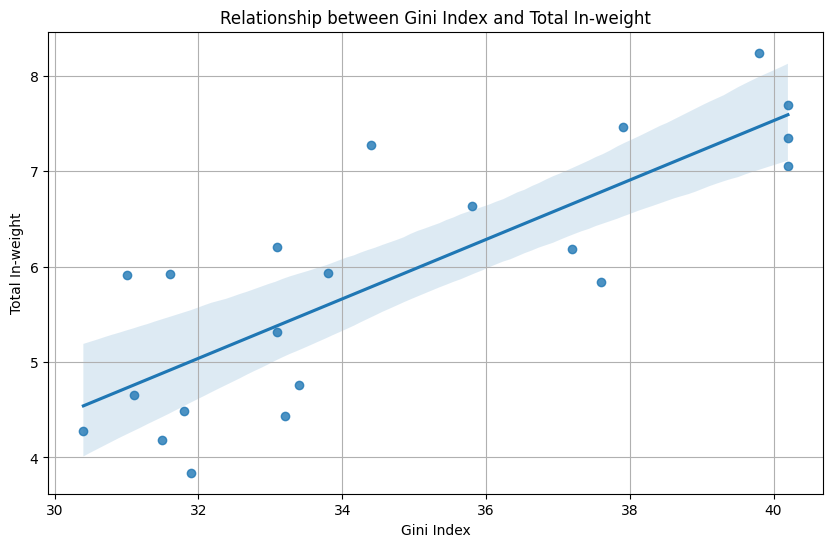

In [8]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Gini Index', y='Total In-weight', data=in_weights_df)
plt.xlabel('Gini Index')
plt.ylabel('Total In-weight')
plt.title('Relationship between Gini Index and Total In-weight')
plt.grid(True)
plt.show()

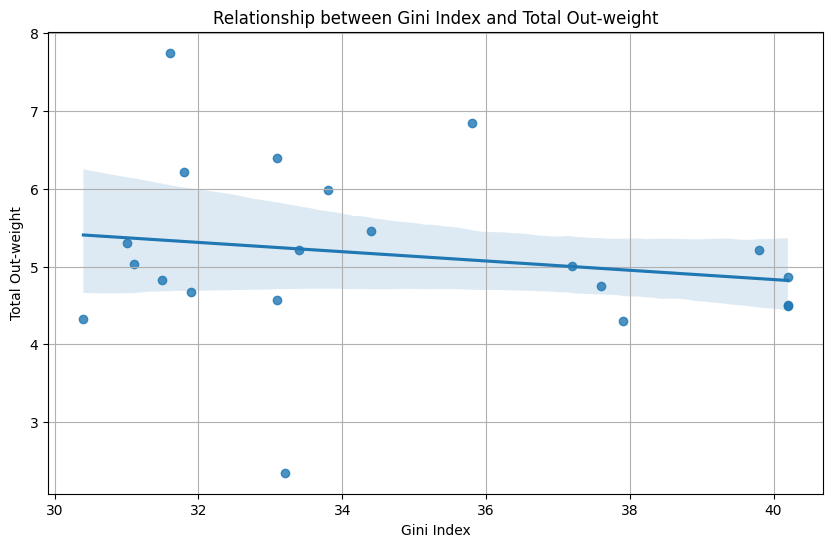

In [9]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Gini Index', y='Total Out-weight', data=out_weights_df)
plt.xlabel('Gini Index')
plt.ylabel('Total Out-weight')
plt.title('Relationship between Gini Index and Total Out-weight')
plt.grid(True)
plt.show()

In [10]:
X = in_weights_df['Median income per consumption unit']
y = in_weights_df['Total In-weight']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Step 3: Fit the regression model
model = sm.OLS(y, X).fit()

# Step 4: Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Total In-weight   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     11.82
Date:                Thu, 21 Nov 2024   Prob (F-statistic):            0.00276
Time:                        11:22:41   Log-Likelihood:                -29.872
No. Observations:                  21   AIC:                             63.74
Df Residuals:                      19   BIC:                             65.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [16]:
X = out_weights_df['Median income per consumption unit']
y = out_weights_df['Total Out-weight']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Step 3: Fit the regression model
model = sm.OLS(y, X).fit()

# Step 4: Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Total Out-weight   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     6.400
Date:                Thu, 21 Nov 2024   Prob (F-statistic):             0.0204
Time:                        11:37:28   Log-Likelihood:                -28.254
No. Observations:                  21   AIC:                             60.51
Df Residuals:                      19   BIC:                             62.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [12]:
X = in_weights_df['Gini Index']
y = in_weights_df['Total In-weight']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Step 3: Fit the regression model
model = sm.OLS(y, X).fit()

# Step 4: Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Total In-weight   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     37.04
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           7.48e-06
Time:                        11:22:42   Log-Likelihood:                -23.593
No. Observations:                  21   AIC:                             51.19
Df Residuals:                      19   BIC:                             53.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.9212      1.784     -2.759      0.0

In [13]:
X = out_weights_df['Gini Index']
y = out_weights_df['Total Out-weight']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Step 3: Fit the regression model
model = sm.OLS(y, X).fit()

# Step 4: Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Total Out-weight   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.6773
Date:                Thu, 21 Nov 2024   Prob (F-statistic):              0.421
Time:                        11:22:43   Log-Likelihood:                -30.935
No. Observations:                  21   AIC:                             65.87
Df Residuals:                      19   BIC:                             67.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2216      2.531      2.854      0.0